## Requirements:

In [1]:
pip install -r ../requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
#add the folder to my sys.path to imoort a common helper file
current_dir = os.path.dirname(os.path.abspath('../helpers.py'))
sys.path.append(current_dir)
from helpers import *

## Fluvius meter data preprocessing

In [3]:
fluvius_data = preprocess_fluvius_daily(raw_dir_set ='../../data/raw/Fluvius/', export_dir_set=False, filewriter= False, return_df = True)


Deze kolommen zijn gedropt: ['Omschrijving', 'Eenheid', 'EAN-code', 'Meter', 'Metertype', 'Van (tijdstip)', 'Tot (datum)', 'Tot (tijdstip)']

0 duplicate rijen gedetecteerd.

Ik heb maar een enkel tarief voor 'gebruik' and 'injectie' dus someren we Dag & Nacht kolommen

Pivot table complete - output: 



Register,Afname Dag,Afname Nacht,Injectie Dag,Injectie Nacht
Dag,,,,
2021-09-01,1.731,1.219,2.483,0.000
2021-09-02,1.081,0.908,9.342,0.000
2021-09-03,0.254,0.801,12.871,0.000
2021-09-04,0.000,2.757,0.000,4.855
2021-09-05,0.000,3.664,0.000,9.022
...,...,...,...,...
2025-03-27,2.492,1.539,11.429,0.000
2025-03-28,2.122,1.667,3.808,0.000
2025-03-29,0.000,2.688,0.000,8.138



Pre-join check: zijn de Dataframes van gelijke lengte? dus hetzelfde aantal dagen? -->True

Dataset bevat 1308 dagen, geen ontbrekend! 
Date range: 2021-09-01 -> 2025-03-31




## Kleine exploratie van de data

In [4]:
# Door Fluvius geïnterpoleerde data, prima. Onbekend wat het probleem was op 16 & 17 juni 2022
# Op 6 & 7 juli 2024 stond de meter uit, dus er is ook geen injectie mogelijk dan)
fluvius_data[fluvius_data['Validatiestatus']  == 'Geschat']

,Validatiestatus,Afname (Kwh),Injectie (Kwh)
Dag,,,
2022-06-16,Geschat,2.170,15.788
2022-06-17,Geschat,2.170,15.788
2024-07-06,Geschat,1.039,0.000
2024-07-07,Geschat,1.039,0.000


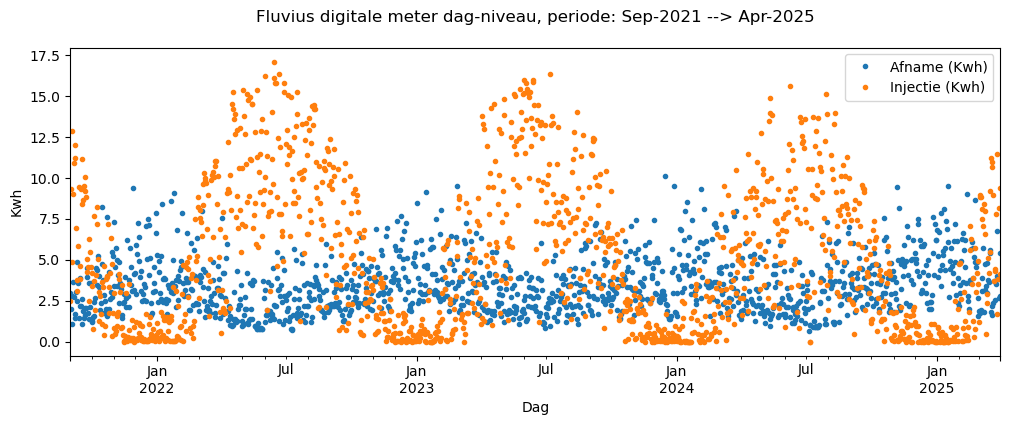

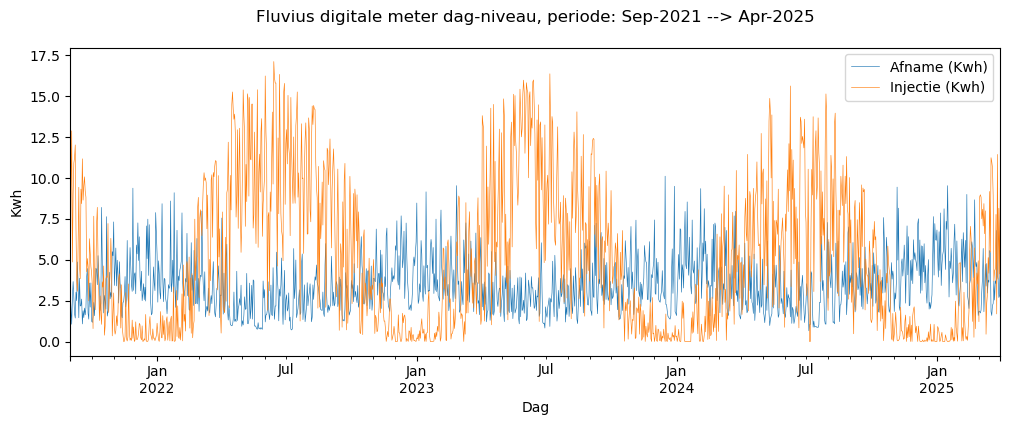

In [5]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Fluvius digitale meter dag-niveau, periode: Sep-2021 --> Apr-2025\n')
ax.set_ylabel('Kwh')
fluvius_data.plot(y='Afname (Kwh)', ax=ax, kind='line',marker='.',linestyle='None')
fluvius_data.plot(y='Injectie (Kwh)',ax=ax, kind='line',marker='.',linestyle='None');

fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Fluvius digitale meter dag-niveau, periode: Sep-2021 --> Apr-2025\n')
ax.set_ylabel('Kwh')
fluvius_data.plot(y='Afname (Kwh)', ax=ax, kind='line',linewidth=0.45)
fluvius_data.plot(y='Injectie (Kwh)',ax=ax, kind='line',linewidth=0.45);

In [6]:
fluvius_data['3d-ra Afname']= fluvius_data['Afname (Kwh)'].rolling(3).mean()
fluvius_data['7d-ra Afname']= fluvius_data['Afname (Kwh)'].rolling(7).mean()
fluvius_data['14d-ra Afname']= fluvius_data['Afname (Kwh)'].rolling(14).mean()
fluvius_data['3d-ra Injectie']= fluvius_data['Injectie (Kwh)'].rolling(3).mean()
fluvius_data['7d-ra Injectie']= fluvius_data['Injectie (Kwh)'].rolling(7).mean()
fluvius_data['14d-ra Injectie']= fluvius_data['Injectie (Kwh)'].rolling(14).mean()


fluvius_data.head(20)

,Validatiestatus,Afname (Kwh),Injectie (Kwh),3d-ra Afname,7d-ra Afname,14d-ra Afname,3d-ra Injectie,7d-ra Injectie,14d-ra Injectie
Dag,,,,,,,,,
2021-09-01,Uitgelezen,2.950,2.483,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-02,Uitgelezen,1.989,9.342,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-03,Uitgelezen,1.055,12.871,1.998000,NaN,NaN,8.232000,NaN,NaN
2021-09-04,Uitgelezen,2.757,4.855,1.933667,NaN,NaN,9.022667,NaN,NaN
2021-09-05,Uitgelezen,3.664,9.022,2.492000,NaN,NaN,8.916000,NaN,NaN
2021-09-06,Uitgelezen,2.750,10.897,3.057000,NaN,NaN,8.258000,NaN,NaN
2021-09-07,Uitgelezen,1.696,11.219,2.703333,2.408714,NaN,10.379333,8.669857,NaN
2021-09-08,Uitgelezen,1.432,12.010,1.959333,2.191857,NaN,11.375333,10.030857,NaN
2021-09-09,Uitgelezen,3.013,6.939,2.047000,2.338143,NaN,10.056000,9.687571,NaN


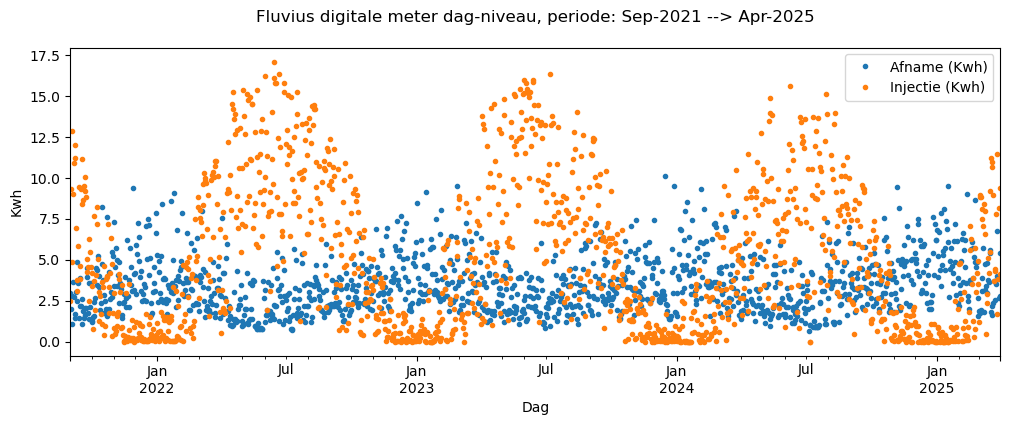

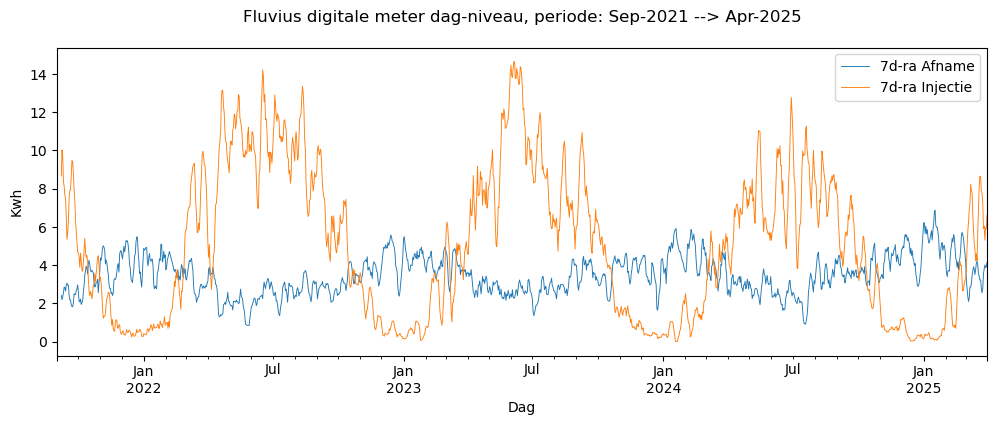

In [7]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Fluvius digitale meter dag-niveau, periode: Sep-2021 --> Apr-2025\n')
ax.set_ylabel('Kwh')
fluvius_data.plot(y='Afname (Kwh)', ax=ax, kind='line',marker='.',linestyle='None')
fluvius_data.plot(y='Injectie (Kwh)',ax=ax, kind='line',marker='.',linestyle='None');

fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Fluvius digitale meter dag-niveau, periode: Sep-2021 --> Apr-2025\n')
ax.set_ylabel('Kwh')
fluvius_data.plot(y='7d-ra Afname', ax=ax, kind='line',linewidth=0.65)
fluvius_data.plot(y='7d-ra Injectie',ax=ax, kind='line',linewidth=0.65);